![](../doc/pics/GPK_BME_MOGI.png)
# Dataprocess examples
This notebook is intended to test and demonstrate the functionalities of the EtoData class. 

Notebook written by András Zöllner, [zollner.andras@gmail.com](mailto:zollner.andras@gmail.com)

## Imports and class instance creation
Please edit `mocapy_file` and `video_file` respectively.

In [1]:
from dataprocess import * #importing EtoData class from file dataprocess.py
import matplotlib.pyplot as plt #plotting

In [2]:
mocapy_file = "../log/Husky_02-processed [MISLABELED EPISODES].csv" #path of the mocapy csv file
video_file = "../log/vid_tags_time_refined.csv" #path of the solomon coder csv file
myData = EtoData(mocapy_file,video_file) #consturct the myData instace of the EtoData class

## Plotting raw data

In [3]:
myData.print_rdpnums() #print raw datapoint numbers in the scenes 

Number of data points:
Ep.	Mocapy	Video
1	6000	6000
2	6000	6000
3	6000	6000
4	6000	6000
5	6000	6000
6	6000	6000
7	6000	6000


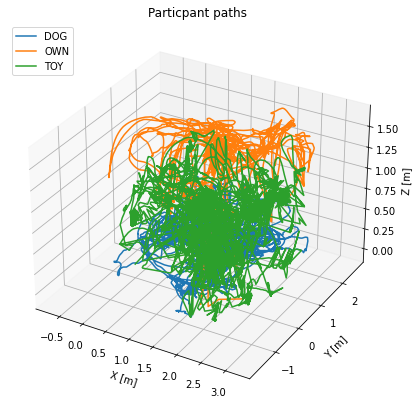

In [4]:
#plot the raw mocapy paths of the participants specified in col_names
myData.raw_plot(mode="path", col_names=["DOG","OWN","TOY"], size=[7,7]) 

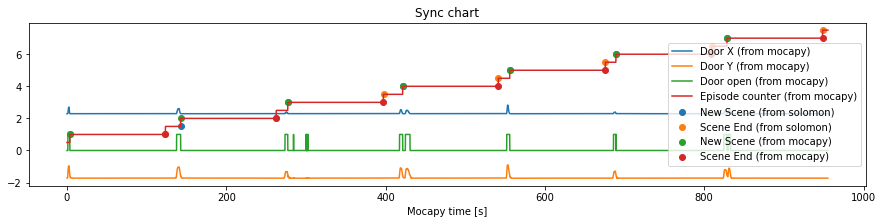

In [5]:
myData.raw_plot(mode="sync", size=[15,3]) #print synchronisation chart

## Accessing and plotting preprocessed data

In [6]:
#accessing preprocessed mocapy and solomon data (numpy arrays) and the data column names
print(myData.mocapy_preproc_head)
print(myData.mocapy_preproc.shape)
print(myData.solomon_preproc_head)
print(myData.solomon_preproc.shape)

#the columns ending with _d in mocapy_preproc are the calculated distances from the dog
#the columns ending with _r in mocapy_preproc are the calculated relative rotations measured from the dog's direction

['Episode counter', 'DOG_pos_X', 'DOG_pos_Y', 'DOG_pos_Z', 'DOG_rot_Z', 'DOG_tracked', 'DOG_has_toy', 'OWN_pos_X', 'OWN_pos_Y', 'OWN_pos_Z', 'OWN_rot_Z', 'OWN_tracked', 'OWN_is_in_room', 'OWN_has_toy', 'OHA_pos_X', 'OHA_pos_Y', 'OHA_pos_Z', 'OHA_rot_Z', 'OHA_tracked', 'STR_pos_X', 'STR_pos_Y', 'STR_pos_Z', 'STR_rot_Z', 'STR_tracked', 'STR_is_in_room', 'STR_has_toy', 'SHA_pos_X', 'SHA_pos_Y', 'SHA_pos_Z', 'SHA_rot_Z', 'SHA_tracked', 'TOY_pos_X', 'TOY_pos_Y', 'TOY_pos_Z', 'TOY_rot_Z', 'TOY_tracked', 'DOOR_pos_X', 'DOOR_pos_Y', 'DOOR_pos_Z', 'DOOR_rot_Z', 'DOOR_tracked', 'DOOR_is_open', 'WAND_pos_X', 'WAND_pos_Y', 'WAND_pos_Z', 'WAND_rot_Z', 'WAND_tracked', 'OWN_d', 'OWN_r', 'OHA_d', 'OHA_r', 'STR_d', 'STR_r', 'SHA_d', 'SHA_r', 'TOY_d', 'TOY_r', 'DOOR_d', 'DOOR_r']
(47590, 59)
['Attention', 'Contact', 'Contact Seeking', 'Tail']
(47590, 4)


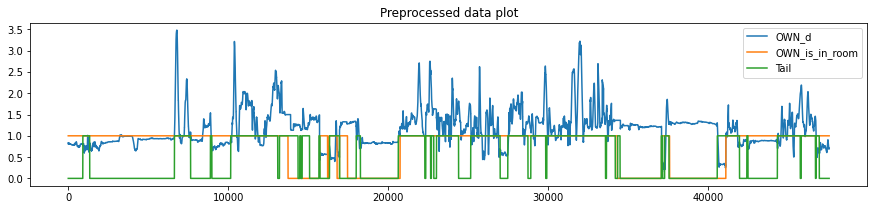

In [7]:
#plotting preprocessed data, specify columns in col_names (can either be in mocapy_preproc or solomon_preproc)
myData.plot_preproc_data(col_names=["OWN_d","OWN_is_in_room","Tail"], size=[15,3], title="Preprocessed data plot")

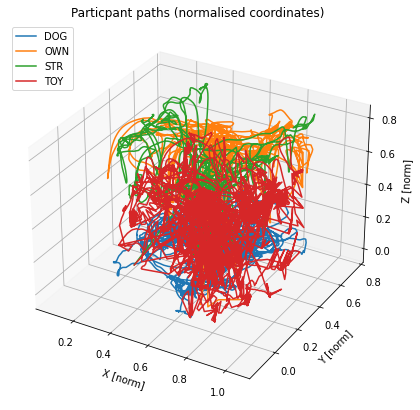

In [8]:
#plot the preprocessed (normalised) mocapy paths of the participants specified in col_names
myData.plot_preproc_data(mode="normpath", col_names=["DOG","OWN","STR","TOY"],size=[7,7])

In [9]:
#getting preprocessed data as a 2 dimensional numpy array, specify columns in col_names (can either be in mocapy_preproc or solomon_preproc)
print(myData.get_preproc_cols(col_names=["OWN_d","OWN_is_in_room","Tail"]).shape)

(47590, 3)


## Accessing individual episodes

EtoData class contains a list of Episode instances, called eps. Each episode class contains the episode's preprocessed mocapy and solomon data, which can be accessed and plotted the same way as the preprocessed solomon and mocapy data is accessed and plotted in case of the EtoData class

Episode #2 - DOG/OWN/STR
['Episode counter', 'DOG_pos_X', 'DOG_pos_Y', 'DOG_pos_Z', 'DOG_rot_Z', 'DOG_tracked', 'DOG_has_toy', 'OWN_pos_X', 'OWN_pos_Y', 'OWN_pos_Z', 'OWN_rot_Z', 'OWN_tracked', 'OWN_is_in_room', 'OWN_has_toy', 'OHA_pos_X', 'OHA_pos_Y', 'OHA_pos_Z', 'OHA_rot_Z', 'OHA_tracked', 'STR_pos_X', 'STR_pos_Y', 'STR_pos_Z', 'STR_rot_Z', 'STR_tracked', 'STR_is_in_room', 'STR_has_toy', 'SHA_pos_X', 'SHA_pos_Y', 'SHA_pos_Z', 'SHA_rot_Z', 'SHA_tracked', 'TOY_pos_X', 'TOY_pos_Y', 'TOY_pos_Z', 'TOY_rot_Z', 'TOY_tracked', 'DOOR_pos_X', 'DOOR_pos_Y', 'DOOR_pos_Z', 'DOOR_rot_Z', 'DOOR_tracked', 'DOOR_is_open', 'WAND_pos_X', 'WAND_pos_Y', 'WAND_pos_Z', 'WAND_rot_Z', 'WAND_tracked', 'OWN_d', 'OWN_r', 'OHA_d', 'OHA_r', 'STR_d', 'STR_r', 'SHA_d', 'SHA_r', 'TOY_d', 'TOY_r', 'DOOR_d', 'DOOR_r']
(6000, 59)
['Attention', 'Contact', 'Contact Seeking', 'Tail']
(6000, 4)


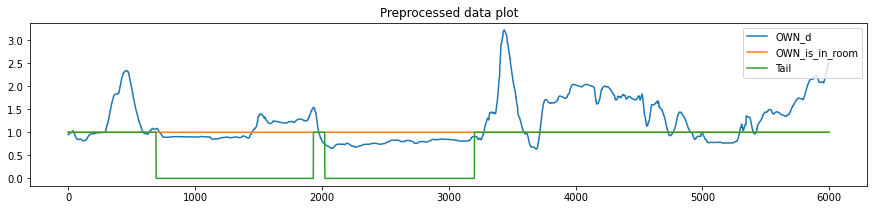

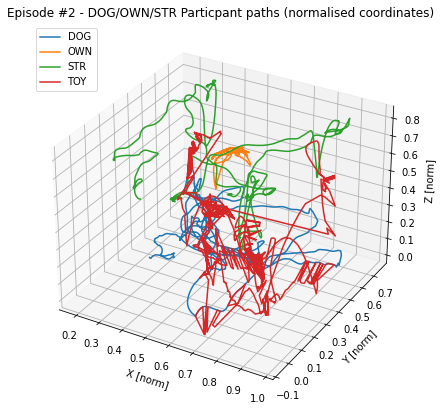

(6000, 3)


In [10]:
epind = 1 #episode index: set from 0 to 6

print(myData.eps[epind].Episode_name) #printing episode name
#accessing preprocessed mocapy and solomon data (numpy arrays) and the data column names
print(myData.eps[epind].mocapy_preproc_head)
print(myData.eps[epind].mocapy_preproc.shape)
print(myData.eps[epind].solomon_preproc_head)
print(myData.eps[epind].solomon_preproc.shape)
#plotting preprocessed data, specify columns in col_names (can either be in mocapy_preproc or solomon_preproc)
myData.eps[epind].plot_preproc_data(col_names=["OWN_d","OWN_is_in_room","Tail"], size=[15,3], title="Preprocessed data plot")
#plot the preprocessed (normalised) mocapy paths of the participants specified in col_names
myData.eps[epind].plot_preproc_data(mode="normpath", col_names=["DOG","OWN","STR","TOY"],size=[7,7])
#getting preprocessed data as a 2 dimensional numpy array, specify columns in col_names (can either be in mocapy_preproc or solomon_preproc)
print(myData.eps[epind].get_preproc_cols(col_names=["OWN_d","OWN_is_in_room","Tail"]).shape)